# Komplexe Zahlen

## Vektorrotation
Komplexe Zahlen können genutzt werden, um Vektoren schnell und einfach zu rotieren. Dies wird in vielen Softwarebereichen benutzt, vor allem zum Beispiel in der Spieleindustrie.

## Einsatzgebiete
Im Bereich der Software werden Vektoren und Rechenoperationen mit diesen benutzt, um Grafiken und Animationen zu erstellen und darzustellen. Auch die Vektorrotation wird hier bentzt, vor allem im Gamingbereich.

### Grundlagen
Um zu verstehen, wie ein Vektor mittels komplexer Zahlen rotiert werden kann, muss erst einmal verstanden werden, wieso Vektoren und komplexe Zahlen sich so ähnlich sind.
Die komplexe Zahl $x = a + b \times i$ kann so in einem kartesischen Koordinatensystem als Punkt $P$ in der Ebene dargestellt werden. Dieser Punkt $P$ hat den realen Anteil $a$ als x-Koordinate und den imaginären Anteil $b$ als y-Koordinate. $i^2$ ist in dem Fall -1.
Dieser Punkt $P$ kann jedoch auch als Vektor vom Ursprung zu diesem Punkt dargestellt werden. Der sogenannte Ortsvektor zum Punkt $P$.

### kartesische vs. Polarkoordinaten
Wie bereits im vorhergehenden Abschnitt erwähnt, können komplexe Zahlen als ein Punkt im kartesischen Koordinatensystem dargestellt werden, mit sogenannten kartesischen Koordinaten.
Es gibt jedoch noch eine andere Schreibweise Vektoren, bzw. komplexe Zahlen darzustellen, welche unter anderem auch für die Vektorrotation benötigt wird. Die sogenannten Polarkoordinaten.
Der Gedanke hinter dieser Darstellung ist, dass man eine Zahl $r$ hat, welche den Betrag des Ortsvektors zum Punkt $P$ bzw. er komplexen Zahl $c$ angibt, und einen Winkel $\phi$, welcher den Winkel des Vektors zur Realachse, also der x-Achse angibt. Damit kann man ebenfalls den Ortsvektor bestimmen und damit auch die komplexe Zahl $c$.

## Vektoren

Damit wir Vektoren überhaupt erst rotieren können, brauchen wir erstmal eine Klasse, welchen unseren Vektor repräsentiert. Die nachfolgende Klasse implementiert die Basisfunktionalität eines Vektors.

In [2]:
from complex import ComplexNumber

class VectorEqualError(Exception):

    @classmethod
    def get_description(cls):
        return "Vectors can't be compared, most likely one parameter isn't a vector"

class VectorTypeError(Exception):

    @classmethod
    def get_description(cls):
        return "Vector components must be of type int or float"


class Vector:

    def __init__(self, x, y):
        if isinstance(x, (int, float)) and isinstance(y, (int, float)):
            self.x = x
            self.y = y
        else:
            raise VectorTypeError()

    def __str__(self):
        return f"Vector({self.x}, {self.y})"

    def __add__(self, other):
        if isinstance(other, Vector):
            return Vector(self.x + other.x, self.y + other.y)
        raise VectorTypeError

    def __sub__(self, other):
        if isinstance(other, Vector):
            return Vector(self.x - other.x, self.y - other.y)
        raise VectorTypeError

    def __eq__(self, other):
        if isinstance(other, Vector):
            return self.x == other.x and self.y == other.y
        raise VectorEqualError

    def rotate_complete(self, angle):
        if not isinstance(angle, (int, float)):
            raise VectorTypeError()
        c = ComplexNumber(self.x, self.y)
        rad = angle * (pi / 180)
        # real * cos = real number.
        # imag * sin = real number, because imag and sin each contain i (i^2 = -1).
        # real * sin = imag number, because sin contains i.
        # imag * cos = imag number, because imag contains i.
        rotated_real = c.real * cos(rad) - c.imag * sin(rad)
        rotated_imag = c.real * sin(rad) + c.imag * cos(rad)
        rotated_c = ComplexNumber(rotated_real, rotated_imag)
        return Vector(rotated_c.real, rotated_c.imag)

    def rotate(self, angle):
        if not isinstance(angle, (int, float)):
            raise VectorTypeError()
        c = ComplexNumber(self.x, self.y)
        rad = angle * (pi / 180)
        # real * cos = real number.
        # imag * sin = real number, because imag and sin each contain i (i^2 = -1).
        # real * sin = imag number, because sin contains i.
        # imag * cos = imag number, because imag contains i.
        rotated_real = round(c.real * cos(rad) - c.imag * sin(rad))
        rotated_imag = round(c.real * sin(rad) + c.imag * cos(rad))
        rotated_c = ComplexNumber(rotated_real, rotated_imag)
        return Vector(rotated_c.real, rotated_c.imag)


## Rotation
Wir können das vorhergehende Wissen und die oben stehende Vektorklasse nun nutzen, um einen gegebenen Vektor im Realraum mittels einer imaginären Zahl $c$ um einen gegebenen Winkel $\omega$ zu rotieren. Betrachten wir hierzu noch einmal die rotate Funktion

In [3]:
from math import cos, sin, pi

def rotate(self, angle):
    if not isinstance(angle, (int, float)):
        raise VectorTypeError()
    # Erstellen einer komplexen Zahl für die Rotation
    c = ComplexNumber(self.x, self.y)
    # Berechnung in Bogenmaß
    rad = angle * (pi / 180)
    # Berechnung der Vektorrotation
    rotated_real = round(c.real * cos(rad) - c.imag * sin(rad))
    rotated_imag = round(c.real * sin(rad) + c.imag * cos(rad))
    # Erstellen neuer komplexer Zahl zur Darstellung des rotierten Vektors
    rotated_c = ComplexNumber(rotated_real, rotated_imag)
    # Rückgabe eines neuen Vektors mit den neuen Koordinaten
    return Vector(rotated_c.real, rotated_c.imag)

### Beispiel
Nehmen wir einmal den Vektor v(5, 7) und einen Winkel von 85°. Um den Vektor nun zu rotieren, muss nur die folgende Funktion aufgerufen werden:

In [4]:
v = Vector(5, 7)
print(v.rotate(85))

Vector(-7, 6)


### Visualisierung
Zum besseren Verständnis kann diese Operation mithilfe von Matplotlib nun auch visualisiert werden.

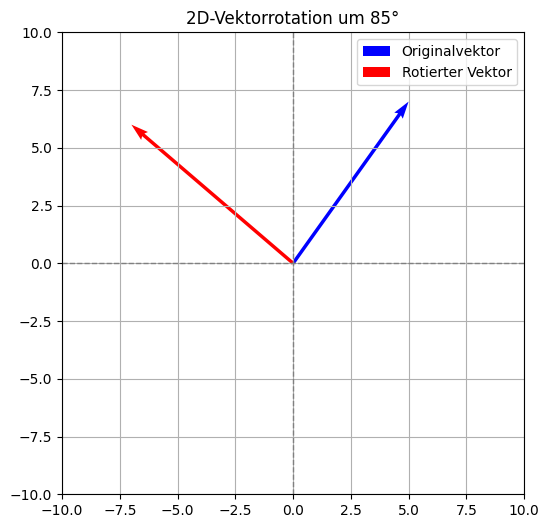

In [5]:
# Visualisierung der Vektoren und Rotation
import matplotlib.pyplot as plt

v = Vector(5, 7)
angle = 85
rotated_v = v.rotate(angle)

plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=1.0, linestyle='dashed')
plt.axvline(0, color='gray', linewidth=1.0, linestyle='dashed')

plt.quiver(0, 0, v.x, v.y, angles='xy', scale_units='xy', scale=1, color='blue', label='Originalvektor')
plt.quiver(0, 0, rotated_v.x, rotated_v.y, angles='xy', scale_units='xy', scale=1, color='red', label='Rotierter Vektor')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title(f"2D-Vektorrotation um {angle}°")
plt.grid()
plt.show()

## Tests
Mindestens genauso wichtig wie guter Code sind gute Tests. Auch in diesem Fall wurden Tests benutzt, um die Funktionalität des Codes sicherzustellen.

In [1]:
import unittest

from errors.VectorTypeError import VectorTypeError
from errors.VectorEqualError import VectorEqualError

class TestVector(unittest.TestCase):
    def setUp(self):
        self.vector_o = Vector(1, 0)
        self.vector_t = Vector(100, 50)

    def test_rotate(self):
        self.assertEqual(self.vector_o.rotate(90), Vector(0, 1))
        self.assertEqual(self.vector_t.rotate(75), Vector(-22, 110))

    def test_errors(self):
        self.assertRaises(VectorTypeError, self.str_error)
        self.assertRaises(VectorEqualError, self.eq_error)
        self.assertRaises(VectorTypeError, self.add_error)
        self.assertRaises(VectorTypeError, self.rotate_err)

    def str_error(self):
        v = Vector("string", 100)

    def eq_error(self):
        self.vector_t == "Hello"

    def add_error(self):
        self.vector_o + 40

    def rotate_err(self):
        self.vector_o.rotate("rotate here")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


# Footer
Projektbeteiligte:
* Gregor Gottschewski
* Leon Heiner
* Marvin Igrec
* Julian Schumacher
* Daniel Ziegler